In [2]:
import pandas as pd   # for data analysis
import xlrd           # read, format Excel xls files
import openpyxl       # read, write Excel xlsx/xlsm files

import matplotlib.pyplot as plt      # data visualization
import plotly.express as px          # data visualization
import plotly.graph_objects as go    # data visualization

In [3]:
%load_ext autoreload
%autoreload 2

# Question: How to work with excel files?

## Python package xlrd

https://xlrd.readthedocs.io/en/latest/index.html

In [5]:
file = "data/env_wasgen.xls"
book = xlrd.open_workbook(file, on_demand=True) # "on_demand" saves memory and time by loading only those sheets that the caller is interested in, and                                                                       releasing sheets when no longer required.

In [6]:
print(f"The number of worksheets is {book.nsheets}")

print("Worksheet name(s):")
len(book.sheet_names()), book.sheet_names()[:10]

The number of worksheets is 660
Worksheet name(s):


(660,
 ['Data',
  'Data2',
  'Data3',
  'Data4',
  'Data5',
  'Data6',
  'Data7',
  'Data8',
  'Data9',
  'Data10'])

In [8]:
sh = book.sheet_by_index(0)

print(f"Sheet name: {sh.name}, nrows: {sh.nrows}, ncols: {sh.ncols}")

sh = book.sheet_by_name("Data2")

print(f"Sheet name: {sh.name}, nrows: {sh.nrows}, ncols: {sh.ncols}")

print(f"Cell A1: {sh.cell_value(rowx=0, colx=0), sh.cell_type(rowx=0, colx=0)}")

Sheet name: Data, nrows: 55, ncols: 10
Sheet name: Data2, nrows: 55, ncols: 10
Cell A1: ('Generation of waste by waste category, hazardousness and NACE Rev. 2 activity  [env_wasgen]', 1)


In [6]:
sh = book.sheet_by_index(0)

# get rows of the sheet
for rx in range(20):
    print(sh.row_values(rx))

['Generation of waste by waste category, hazardousness and NACE Rev. 2 activity  [env_wasgen]', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '']
['Last update', 44316.50739583334, '', '', '', '', '', '', '', '']
['Extracted on', 44347.90493962963, '', '', '', '', '', '', '', '']
['Source of data', 'Eurostat', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '']
['UNIT', 'KG_HAB - Kilograms per capita', '', '', '', '', '', '', '', '']
['HAZARD', 'HAZ_NHAZ - Hazardous and non-hazardous - Total', '', '', '', '', '', '', '', '']
['WASTE', 'TOTAL - Total waste', '', '', '', '', '', '', '', '']
['NACE_R2', 'A - Agriculture, forestry and fishing', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '']
['GEO', 'GEO(L)/TIME', '2004', '2006', '2008', '2010', '2012', '2014', '2016', '2018']
['EU27_2020', 'European Union - 27 countries (from 2020)', 146.0, 131.0, 104.0, 47.0, 47.0, 41.0, 45.0, 45.0]
['EU28', 'European Union - 28 cou

## Finding the right sheet

We have the following information in each sheet 

- UNIT
- HAZARD
- WASTE
- NACE_R2

Now lets try to find a way to get all available information

What is [NACE_R2](https://ec.europa.eu/eurostat/web/nace-rev2)?

> NACE ist das Akronym3 zur Bezeichnung der verschiedenen statistischen Systematiken der Wirtschaftszweige, die seit
1970 in der Europäischen Union entwickelt worden sind. Die NACE bildet den Rahmen für die Sammlung und Darstellung
einer breiten Palette statistischer, nach Wirtschaftszweigen untergliederter Daten aus dem Bereich Wirtschaft
(z. B. Produktion, Beschäftigung, Volkswirtschaftliche Gesamtrechnungen) und aus anderen Bereichen.

In [9]:
from collections import defaultdict # why defaultdict? Cause if key is not found in the dictionary, then instead of KeyError, a new entry is created
                                    # by declaration: list, set or int

header_rows = range(6,10)

header = defaultdict(set)
for sheet in book.sheet_names():
    sh = book.sheet_by_name(sheet)

    for row in header_rows:
        label, value = sh.cell_value(row, 0), sh.cell_value(row, 1)
        header[label].add(value)


In [10]:
header

defaultdict(set,
            {'UNIT': {'KG_HAB - Kilograms per capita', 'T - Tonne'},
             'HAZARD': {'HAZ - Hazardous',
              'HAZ_NHAZ - Hazardous and non-hazardous - Total',
              'NHAZ - Non-hazardous'},
             'WASTE': {'PRIM - Primary waste (TOTAL minus SEC)',
              'SEC - Secondary waste (W033+W103+W128_13)',
              'TOTAL - Total waste',
              'TOT_X_MIN - Waste excluding major mineral wastes',
              'W01-05 - Chemical and medical wastes (subtotal)',
              'W06_07A - Recyclable wastes (subtotal, W06+W07 except W077)',
              'W077_08 - Equipment (subtotal, W077+W08A+W081+W0841)',
              'W09 - Animal and vegetal wastes (subtotal, W091+W092+W093)',
              'W10 - Mixed ordinary wastes (subtotal, W101+W102+W103)',
              'W11 - Common sludges',
              'W12-13 - Mineral and solidified wastes (subtotal)'},
             'NACE_R2': {'A - Agriculture, forestry and fishing',
         

In [13]:
codes = {k: {s.split(" - ")[0]: s.split(" - ")[1] for s in v} for k,v in header.items()}

In [14]:
codes

{'UNIT': {'T': 'Tonne', 'KG_HAB': 'Kilograms per capita'},
 'HAZARD': {'HAZ_NHAZ': 'Hazardous and non-hazardous',
  'NHAZ': 'Non-hazardous',
  'HAZ': 'Hazardous'},
 'WASTE': {'W10': 'Mixed ordinary wastes (subtotal, W101+W102+W103)',
  'TOT_X_MIN': 'Waste excluding major mineral wastes',
  'SEC': 'Secondary waste (W033+W103+W128_13)',
  'TOTAL': 'Total waste',
  'W077_08': 'Equipment (subtotal, W077+W08A+W081+W0841)',
  'W06_07A': 'Recyclable wastes (subtotal, W06+W07 except W077)',
  'W11': 'Common sludges',
  'W01-05': 'Chemical and medical wastes (subtotal)',
  'PRIM': 'Primary waste (TOTAL minus SEC)',
  'W12-13': 'Mineral and solidified wastes (subtotal)',
  'W09': 'Animal and vegetal wastes (subtotal, W091+W092+W093)'},
 'NACE_R2': {'EP_HH': 'Households',
  'G4677': 'Wholesale of waste and scrap',
  'B': 'Mining and quarrying',
  'E': 'Water supply; sewerage, waste management and remediation activities',
  'TOTAL_HH': 'All NACE activities plus households',
  'G-U_X_G4677': 'Servi

In [15]:
def print_codes():
    for k,v in codes.items():
        print("Category: ", k)
        print("---------")
        for k,v in v.items():
            print(f"{k}: {v}")
        print()

In [16]:
print_codes()

Category:  UNIT
---------
T: Tonne
KG_HAB: Kilograms per capita

Category:  HAZARD
---------
HAZ_NHAZ: Hazardous and non-hazardous
NHAZ: Non-hazardous
HAZ: Hazardous

Category:  WASTE
---------
W10: Mixed ordinary wastes (subtotal, W101+W102+W103)
TOT_X_MIN: Waste excluding major mineral wastes
SEC: Secondary waste (W033+W103+W128_13)
TOTAL: Total waste
W077_08: Equipment (subtotal, W077+W08A+W081+W0841)
W06_07A: Recyclable wastes (subtotal, W06+W07 except W077)
W11: Common sludges
W01-05: Chemical and medical wastes (subtotal)
PRIM: Primary waste (TOTAL minus SEC)
W12-13: Mineral and solidified wastes (subtotal)
W09: Animal and vegetal wastes (subtotal, W091+W092+W093)

Category:  NACE_R2
---------
EP_HH: Households
G4677: Wholesale of waste and scrap
B: Mining and quarrying
E: Water supply; sewerage, waste management and remediation activities
TOTAL_HH: All NACE activities plus households
G-U_X_G4677: Services (except wholesale of waste and scrap)
F: Construction
D: Electricity, gas,

## Reading xls with pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [17]:
file = "data/env_wasgen.xls"
df = pd.read_excel(file)

In [14]:
df

,"Generation of waste by waste category, hazardousness and NACE Rev. 2 activity [env_wasgen]",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last update,2021-04-30 12:10:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Extracted on,2021-05-31 21:43:06.784000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Source of data,Eurostat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UNIT,KG_HAB - Kilograms per capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,HAZARD,HAZ_NHAZ - Hazardous and non-hazardous - Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,WASTE,TOTAL - Total waste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NACE_R2,"A - Agriculture, forestry and fishing",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = pd.read_excel(file, header=11, nrows=40)

In [16]:
df

,GEO,GEO(L)/TIME,2004,2006,2008,2010,2012,2014,2016,2018
0,EU27_2020,European Union - 27 countries (from 2020),146,131,104,47,47,41,45,45
1,EU28,European Union - 28 countries (2013-2020),130,116,93,42,42,37,41,41
2,BE,Belgium,114,34,27,21,15,28,24,39
3,BG,Bulgaria,94,83,101,84,124,116,87,44
4,CZ,Czechia,122,31,25,11,19,13,11,39
5,DK,Denmark,4,5,7,34,13,21,35,65
6,DE,Germany (until 1990 former territory of the FRG),15,18,16,3,8,5,14,12
7,EE,Estonia,135,88,179,83,59,93,87,105
8,IE,Ireland,2,0,4,22,21,21,22,61
9,EL,Greece,430,428,0,0,1,1,24,45


In [17]:
df[df["GEO"] == "DE"]

,GEO,GEO(L)/TIME,2004,2006,2008,2010,2012,2014,2016,2018
6,DE,Germany (until 1990 former territory of the FRG),15,18,16,3,8,5,14,12


In [18]:
df.info()  # everything seems to be a string -> ":" causes the problem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GEO          40 non-null     object
 1   GEO(L)/TIME  40 non-null     object
 2   2004         40 non-null     object
 3   2006         40 non-null     object
 4   2008         40 non-null     object
 5   2010         40 non-null     object
 6   2012         40 non-null     object
 7   2014         40 non-null     object
 8   2016         40 non-null     object
 9   2018         40 non-null     object
dtypes: object(10)
memory usage: 3.2+ KB


In [19]:
df = pd.read_excel(file, header=11, nrows=40, na_values=":")   # the last parameter fixes the problem with ":"
df

,GEO,GEO(L)/TIME,2004,2006,2008,2010,2012,2014,2016,2018
0,EU27_2020,European Union - 27 countries (from 2020),146.0,131.0,104.0,47.0,47.0,41.0,45.0,45.0
1,EU28,European Union - 28 countries (2013-2020),130.0,116.0,93.0,42.0,42.0,37.0,41.0,41.0
2,BE,Belgium,114.0,34.0,27.0,21.0,15.0,28.0,24.0,39.0
3,BG,Bulgaria,94.0,83.0,101.0,84.0,124.0,116.0,87.0,44.0
4,CZ,Czechia,122.0,31.0,25.0,11.0,19.0,13.0,11.0,39.0
5,DK,Denmark,4.0,5.0,7.0,34.0,13.0,21.0,35.0,65.0
6,DE,Germany (until 1990 former territory of the FRG),15.0,18.0,16.0,3.0,8.0,5.0,14.0,12.0
7,EE,Estonia,135.0,88.0,179.0,83.0,59.0,93.0,87.0,105.0
8,IE,Ireland,2.0,0.0,4.0,22.0,21.0,21.0,22.0,61.0
9,EL,Greece,430.0,428.0,0.0,0.0,1.0,1.0,24.0,45.0


In [20]:
df.info()  # now all number columns are correctly recognized by pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GEO          40 non-null     object 
 1   GEO(L)/TIME  40 non-null     object 
 2   2004         33 non-null     float64
 3   2006         32 non-null     float64
 4   2008         34 non-null     float64
 5   2010         35 non-null     float64
 6   2012         38 non-null     float64
 7   2014         38 non-null     float64
 8   2016         39 non-null     float64
 9   2018         38 non-null     float64
dtypes: float64(8), object(2)
memory usage: 3.2+ KB


In [21]:
def get_data_from_sheet(excel_file: str, header: tuple) -> pd.DataFrame:
    book = xlrd.open_workbook(file, on_demand=True)

    sheet_name = ""
    for sheet in book.sheet_names():
        sh = book.sheet_by_name(sheet)

        value = tuple(x.split(" - ")[0] for x in sh.col_values(1, 6, 10))

        if value == header:
            sheet_name = sheet
            break

    if sheet_name:
        return pd.read_excel(file, sheet_name=sheet_name, header=11, nrows=40, na_values=":").drop(columns="GEO(L)/TIME").set_index("GEO")
    else:
        return pd.DataFrame()

In [22]:
print_codes()

Category:  UNIT
---------
T: Tonne
KG_HAB: Kilograms per capita

Category:  HAZARD
---------
HAZ: Hazardous
HAZ_NHAZ: Hazardous and non-hazardous
NHAZ: Non-hazardous

Category:  WASTE
---------
W09: Animal and vegetal wastes (subtotal, W091+W092+W093)
SEC: Secondary waste (W033+W103+W128_13)
TOT_X_MIN: Waste excluding major mineral wastes
W06_07A: Recyclable wastes (subtotal, W06+W07 except W077)
PRIM: Primary waste (TOTAL minus SEC)
W11: Common sludges
W10: Mixed ordinary wastes (subtotal, W101+W102+W103)
TOTAL: Total waste
W01-05: Chemical and medical wastes (subtotal)
W12-13: Mineral and solidified wastes (subtotal)
W077_08: Equipment (subtotal, W077+W08A+W081+W0841)

Category:  NACE_R2
---------
EP_HH: Households
B: Mining and quarrying
A: Agriculture, forestry and fishing
C: Manufacturing
G4677: Wholesale of waste and scrap
F: Construction
TOTAL_HH: All NACE activities plus households
D: Electricity, gas, steam and air conditioning supply
G-U_X_G4677: Services (except wholesale of

In [23]:
df = get_data_from_sheet(file, ("KG_HAB", "HAZ_NHAZ", "TOTAL", "A"))

In [24]:
df

,2004,2006,2008,2010,2012,2014,2016,2018
GEO,,,,,,,,
EU27_2020,146.0,131.0,104.0,47.0,47.0,41.0,45.0,45.0
EU28,130.0,116.0,93.0,42.0,42.0,37.0,41.0,41.0
BE,114.0,34.0,27.0,21.0,15.0,28.0,24.0,39.0
BG,94.0,83.0,101.0,84.0,124.0,116.0,87.0,44.0
CZ,122.0,31.0,25.0,11.0,19.0,13.0,11.0,39.0
DK,4.0,5.0,7.0,34.0,13.0,21.0,35.0,65.0
DE,15.0,18.0,16.0,3.0,8.0,5.0,14.0,12.0
EE,135.0,88.0,179.0,83.0,59.0,93.0,87.0,105.0
IE,2.0,0.0,4.0,22.0,21.0,21.0,22.0,61.0


## Plotting the data

<AxesSubplot:>

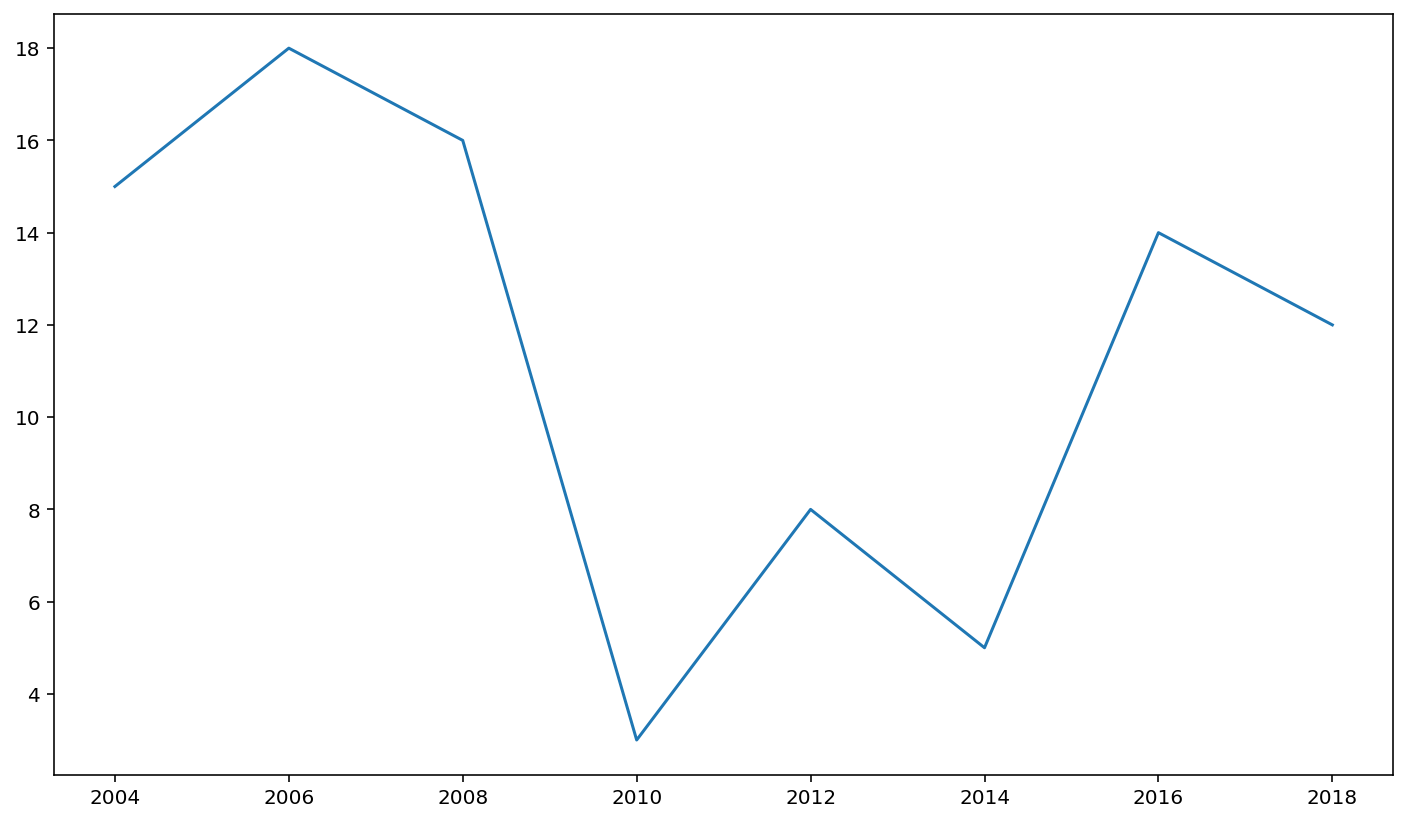

In [25]:
df.loc["DE"].plot()

<AxesSubplot:title={'center':'Total waste generation for Germany from 2004 to 2018\n'}, ylabel='Kilograms per capita'>

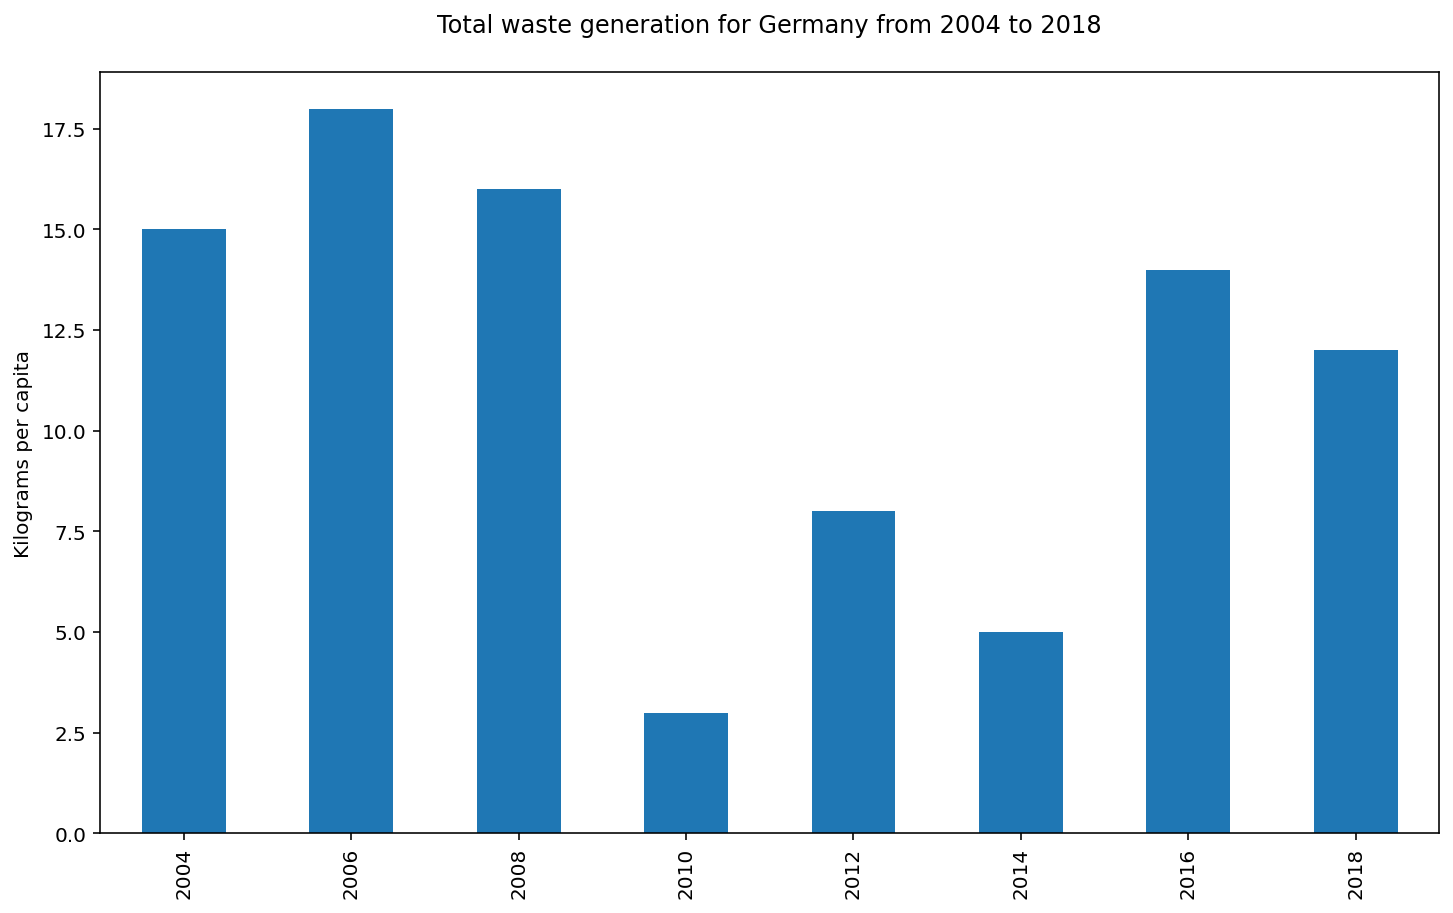

In [26]:
df.loc["DE"].plot.bar(title="Total waste generation for Germany from 2004 to 2018\n", ylabel="Kilograms per capita")

<AxesSubplot:ylabel='GEO'>

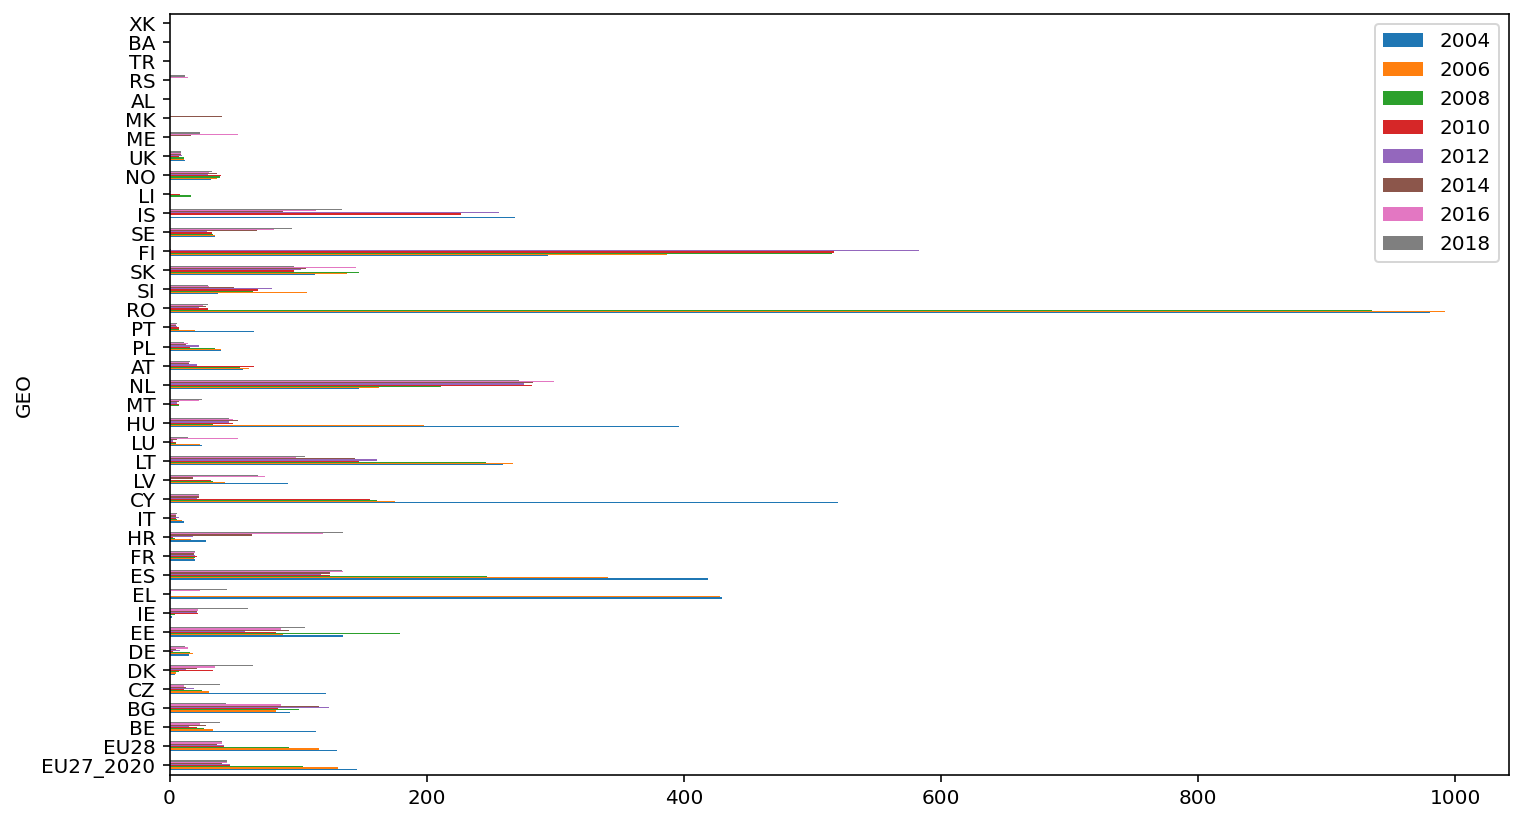

In [27]:
df.plot(kind="barh")

In [27]:
?px.bar

Signature:
px.bar(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    base=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a bar plot, each row of `data_frame` is represented as a rectangular
    mark.
    
Parameters
----------
data_frame: DataFrame or array-like or dict
   

In [28]:
fig = px.bar(df, x=df.columns, y=df.index, barmode="relative")
fig.show()

In [30]:
df = get_data_from_sheet(file, ("T", "HAZ_NHAZ", "TOTAL", "A"))

In [30]:
px.bar(df, x=df.columns, y=df.index, barmode="relative")

## wide vs long

How can we combine different sheets?

In [31]:
df

,2004,2006,2008,2010,2012,2014,2016,2018
GEO,,,,,,,,
EU27_2020,63350000.0,57030000.0,45850000.0,20540000.0,20770000.0,18090000.0,20140000.0,20260000.0
EU28,64070000.0,57700000.0,46530000.0,21000000.0,21380000.0,18710000.0,20710000.0,20870000.0
BE,1186648.0,361827.0,287656.0,225622.0,165463.0,311835.0,269190.0,441047.0
BG,722228.0,632966.0,754286.0,618107.0,903119.0,835401.0,617689.0,308760.0
CZ,1244149.0,315585.0,254546.0,113683.0,196063.0,135313.0,114575.0,411533.0
DK,24038.0,27550.0,40731.0,189101.0,75225.0,117682.0,201648.0,373978.0
DE,1226989.0,1515272.0,1350758.0,256272.0,648869.0,438829.0,1126134.0,982106.0
EE,183860.0,118829.0,240005.0,109873.0,77404.0,121677.0,113946.0,138195.0
IE,8706.0,0.0,19376.0,101143.0,96251.0,96251.0,105033.0,296865.0


In [32]:
?df.melt

Signature:
df.melt(
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name='value',
    col_level=None,
    ignore_index=True,
) -> 'DataFrame'
Docstring:
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one
or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to
the row axis, leaving just two non-identifier columns, 'variable' and
'value'.

Parameters
----------
id_vars : tuple, list, or ndarray, optional
    Column(s) to use as identifier variables.
value_vars : tuple, list, or ndarray, optional
    Column(s) to unpivot. If not specified, uses all columns that
    are not set as `id_vars`.
var_name : scalar
    Name to use for the 'variable' column. If None it uses
    ``frame.columns.name`` or 'variable'.
value_name : scalar, default 'value'
    Name to use for the 'value' column

In [32]:
df.melt(var_name="year", value_name="KG", ignore_index=False)

,year,KG
GEO,,
EU27_2020,2004,63350000.0
EU28,2004,64070000.0
BE,2004,1186648.0
BG,2004,722228.0
CZ,2004,1244149.0
...,...,...
AL,2018,NaN
RS,2018,82473.0
TR,2018,0.0


In [33]:
df = get_data_from_sheet(file, ("KG_HAB", "HAZ_NHAZ", "TOTAL", "A"))
df = df.reset_index().melt(id_vars="GEO", var_name="year", value_name="value")
df = df.assign(unit="KG_HAB", hazard="HAZ_NHAZ", waste="TOTAL", nace_r2="A")
df.year = df.year.astype("category")

In [34]:
df

,GEO,year,value,unit,hazard,waste,nace_r2
0,EU27_2020,2004,146.0,KG_HAB,HAZ_NHAZ,TOTAL,A
1,EU28,2004,130.0,KG_HAB,HAZ_NHAZ,TOTAL,A
2,BE,2004,114.0,KG_HAB,HAZ_NHAZ,TOTAL,A
3,BG,2004,94.0,KG_HAB,HAZ_NHAZ,TOTAL,A
4,CZ,2004,122.0,KG_HAB,HAZ_NHAZ,TOTAL,A
...,...,...,...,...,...,...,...
315,AL,2018,NaN,KG_HAB,HAZ_NHAZ,TOTAL,A
316,RS,2018,12.0,KG_HAB,HAZ_NHAZ,TOTAL,A
317,TR,2018,0.0,KG_HAB,HAZ_NHAZ,TOTAL,A
318,BA,2018,0.0,KG_HAB,HAZ_NHAZ,TOTAL,A


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   GEO      320 non-null    object  
 1   year     320 non-null    category
 2   value    287 non-null    float64 
 3   unit     320 non-null    object  
 4   hazard   320 non-null    object  
 5   waste    320 non-null    object  
 6   nace_r2  320 non-null    object  
dtypes: category(1), float64(1), object(5)
memory usage: 15.8+ KB


In [36]:
df_ = df.groupby(["year"]).apply(lambda df: df.sort_values("value"))
px.bar(df_, x="year", y="value", color="GEO", barmode="relative", labels={"value": "Kilograms per capita", "GEO": "Country"} )

In [55]:
df.groupby("GEO").value.agg("sum").sort_values(ascending=False).tolist()

[3044.0,
 2297.0,
 1933.0,
 1644.0,
 1427.0,
 1102.0,
 1088.0,
 945.0,
 929.0,
 871.0,
 829.0,
 733.0,
 606.0,
 542.0,
 470.0,
 410.0,
 388.0,
 363.0,
 307.0,
 302.0,
 279.0,
 271.0,
 192.0,
 184.0,
 159.0,
 153.0,
 135.0,
 122.0,
 94.0,
 91.0,
 78.0,
 75.0,
 55.0,
 41.0,
 26.0,
 26.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [58]:
px.bar(df, x="GEO", y="value", color="year", barmode="relative", labels={"value": "Kilograms per capita", "GEO": "Country"}, category_orders={"GEO": df.groupby("GEO").value.agg("sum").sort_values(ascending=True).index.tolist()})

In [40]:
df.sort_values(["year","value"]).query("year == '2006'")

,GEO,year,value,unit,hazard,waste,nace_r2
48,IE,2006,0.0,KG_HAB,HAZ_NHAZ,TOTAL,A
59,MT,2006,0.0,KG_HAB,HAZ_NHAZ,TOTAL,A
77,TR,2006,0.0,KG_HAB,HAZ_NHAZ,TOTAL,A
45,DK,2006,5.0,KG_HAB,HAZ_NHAZ,TOTAL,A
53,IT,2006,10.0,KG_HAB,HAZ_NHAZ,TOTAL,A
72,UK,2006,11.0,KG_HAB,HAZ_NHAZ,TOTAL,A
52,HR,2006,17.0,KG_HAB,HAZ_NHAZ,TOTAL,A
46,DE,2006,18.0,KG_HAB,HAZ_NHAZ,TOTAL,A
51,FR,2006,19.0,KG_HAB,HAZ_NHAZ,TOTAL,A
63,PT,2006,20.0,KG_HAB,HAZ_NHAZ,TOTAL,A


<AxesSubplot:xlabel='year'>

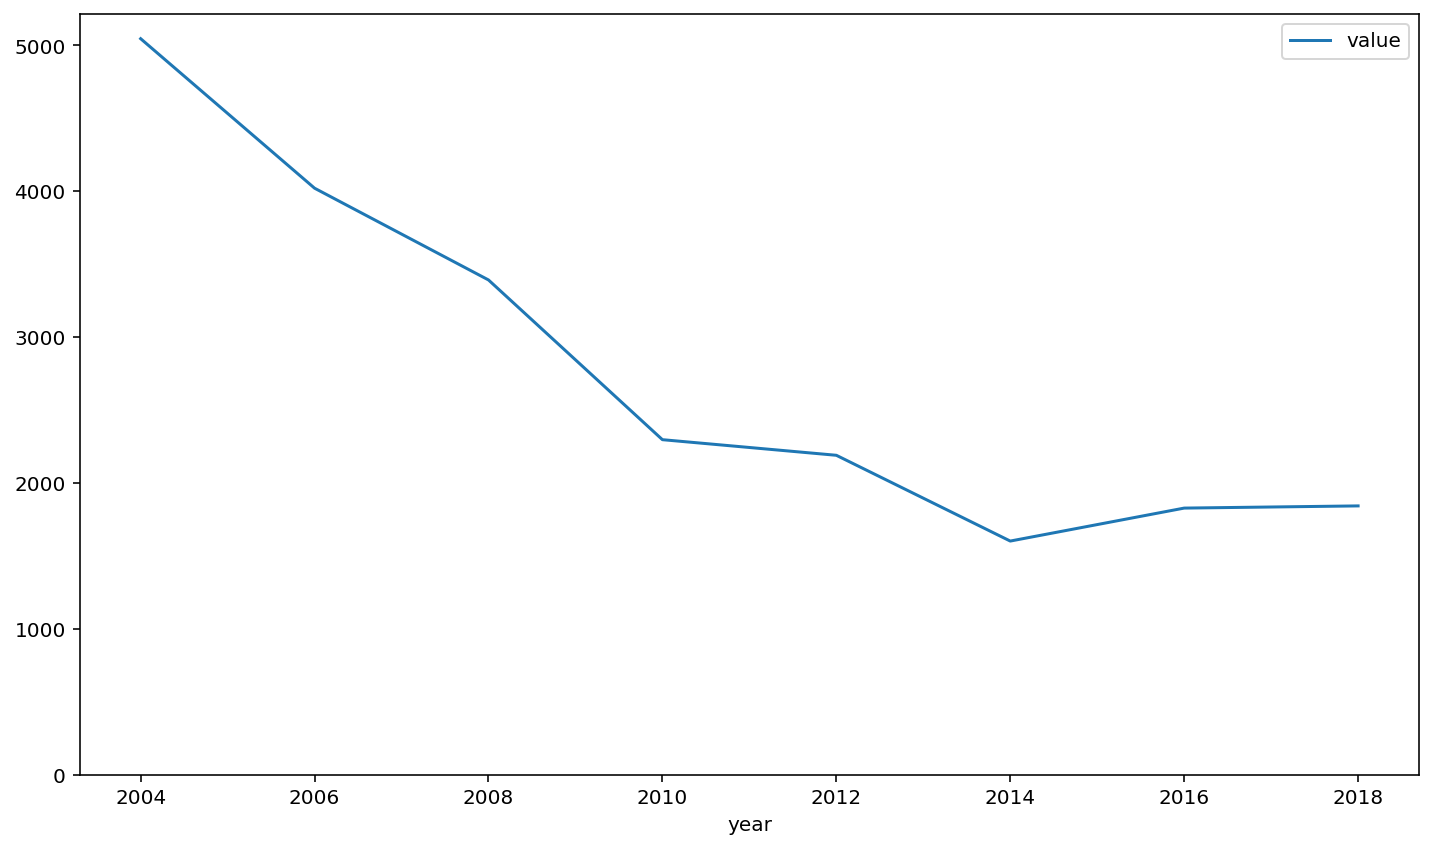

In [41]:
df.groupby("year").sum().plot(ylim=0)

## join datasets

With the long format it is now much easier to combine two datasets

In [59]:
df1 = get_data_from_sheet(file, ("KG_HAB", "HAZ_NHAZ", "TOTAL", "A"))
df1 = df1.reset_index().melt(id_vars="GEO", var_name="year", value_name="value")
df1 = df1.assign(unit="KG_HAB", hazard="HAZ_NHAZ", waste="TOTAL", nace_r2="A")
df1.year = df1.year.astype("category")

df2 = get_data_from_sheet(file, ("KG_HAB", "HAZ_NHAZ", "TOTAL", "B"))
df2 = df2.reset_index().melt(id_vars="GEO", var_name="year", value_name="value")
df2 = df2.assign(unit="KG_HAB", hazard="HAZ_NHAZ", waste="TOTAL", nace_r2="B")
df2.year = df2.year.astype("category")

In [60]:
df1

,GEO,year,value,unit,hazard,waste,nace_r2
0,EU27_2020,2004,146.0,KG_HAB,HAZ_NHAZ,TOTAL,A
1,EU28,2004,130.0,KG_HAB,HAZ_NHAZ,TOTAL,A
2,BE,2004,114.0,KG_HAB,HAZ_NHAZ,TOTAL,A
3,BG,2004,94.0,KG_HAB,HAZ_NHAZ,TOTAL,A
4,CZ,2004,122.0,KG_HAB,HAZ_NHAZ,TOTAL,A
...,...,...,...,...,...,...,...
315,AL,2018,NaN,KG_HAB,HAZ_NHAZ,TOTAL,A
316,RS,2018,12.0,KG_HAB,HAZ_NHAZ,TOTAL,A
317,TR,2018,0.0,KG_HAB,HAZ_NHAZ,TOTAL,A
318,BA,2018,0.0,KG_HAB,HAZ_NHAZ,TOTAL,A


In [61]:
df2

,GEO,year,value,unit,hazard,waste,nace_r2
0,EU27_2020,2004,1655.0,KG_HAB,HAZ_NHAZ,TOTAL,B
1,EU28,2004,1525.0,KG_HAB,HAZ_NHAZ,TOTAL,B
2,BE,2004,37.0,KG_HAB,HAZ_NHAZ,TOTAL,B
3,BG,2004,22184.0,KG_HAB,HAZ_NHAZ,TOTAL,B
4,CZ,2004,69.0,KG_HAB,HAZ_NHAZ,TOTAL,B
...,...,...,...,...,...,...,...
315,AL,2018,NaN,KG_HAB,HAZ_NHAZ,TOTAL,B
316,RS,2018,5532.0,KG_HAB,HAZ_NHAZ,TOTAL,B
317,TR,2018,214.0,KG_HAB,HAZ_NHAZ,TOTAL,B
318,BA,2018,158.0,KG_HAB,HAZ_NHAZ,TOTAL,B


In [62]:
df = df1.append(df2)

In [63]:
df

,GEO,year,value,unit,hazard,waste,nace_r2
0,EU27_2020,2004,146.0,KG_HAB,HAZ_NHAZ,TOTAL,A
1,EU28,2004,130.0,KG_HAB,HAZ_NHAZ,TOTAL,A
2,BE,2004,114.0,KG_HAB,HAZ_NHAZ,TOTAL,A
3,BG,2004,94.0,KG_HAB,HAZ_NHAZ,TOTAL,A
4,CZ,2004,122.0,KG_HAB,HAZ_NHAZ,TOTAL,A
...,...,...,...,...,...,...,...
315,AL,2018,NaN,KG_HAB,HAZ_NHAZ,TOTAL,B
316,RS,2018,5532.0,KG_HAB,HAZ_NHAZ,TOTAL,B
317,TR,2018,214.0,KG_HAB,HAZ_NHAZ,TOTAL,B
318,BA,2018,158.0,KG_HAB,HAZ_NHAZ,TOTAL,B


In [64]:
px.bar(df[(df.GEO == "DE")], x="year", y="value", color="nace_r2")

# Summary

We have written two very convenient helper functions: 
1. `print_codes` to get a nice report about all codes in the dataset
1. `get_data_from_excel` to get either a single, multiple or the complete data from the excel as data frame

In [72]:
from utils import *

In [74]:
file = "data/env_wasgen.xls"

In [75]:
print_codes(file)

Category:  UNIT
---------
T: Tonne
KG_HAB: Kilograms per capita

Category:  HAZARD
---------
HAZ: Hazardous
HAZ_NHAZ: Hazardous and non-hazardous
NHAZ: Non-hazardous

Category:  WASTE
---------
W09: Animal and vegetal wastes (subtotal, W091+W092+W093)
SEC: Secondary waste (W033+W103+W128_13)
TOT_X_MIN: Waste excluding major mineral wastes
W06_07A: Recyclable wastes (subtotal, W06+W07 except W077)
PRIM: Primary waste (TOTAL minus SEC)
W11: Common sludges
W10: Mixed ordinary wastes (subtotal, W101+W102+W103)
TOTAL: Total waste
W01-05: Chemical and medical wastes (subtotal)
W12-13: Mineral and solidified wastes (subtotal)
W077_08: Equipment (subtotal, W077+W08A+W081+W0841)

Category:  NACE_R2
---------
EP_HH: Households
B: Mining and quarrying
A: Agriculture, forestry and fishing
C: Manufacturing
G4677: Wholesale of waste and scrap
F: Construction
TOTAL_HH: All NACE activities plus households
D: Electricity, gas, steam and air conditioning supply
G-U_X_G4677: Services (except wholesale of

In [84]:
df = get_data_from_excel(file, [("KG_HAB", "HAZ_NHAZ", "TOTAL", "A")])

In [85]:
df

,year,value,unit,hazard,waste,nace_r2
geo,,,,,,
EU27_2020,2004,146.0,KG_HAB,HAZ_NHAZ,TOTAL,A
EU28,2004,130.0,KG_HAB,HAZ_NHAZ,TOTAL,A
BE,2004,114.0,KG_HAB,HAZ_NHAZ,TOTAL,A
BG,2004,94.0,KG_HAB,HAZ_NHAZ,TOTAL,A
CZ,2004,122.0,KG_HAB,HAZ_NHAZ,TOTAL,A
...,...,...,...,...,...,...
AL,2018,NaN,KG_HAB,HAZ_NHAZ,TOTAL,A
RS,2018,12.0,KG_HAB,HAZ_NHAZ,TOTAL,A
TR,2018,0.0,KG_HAB,HAZ_NHAZ,TOTAL,A


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 320 entries, EU27_2020 to XK
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   year     320 non-null    int64   
 1   value    287 non-null    float64 
 2   unit     320 non-null    category
 3   hazard   320 non-null    category
 4   waste    320 non-null    category
 5   nace_r2  320 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 8.4 KB


In [87]:
df = get_data_from_excel(file, [("KG_HAB", "HAZ_NHAZ", "TOTAL", "A"), ("KG_HAB", "HAZ_NHAZ", "TOTAL", "B")])
df

,year,value,unit,hazard,waste,nace_r2
geo,,,,,,
EU27_2020,2004,146.0,KG_HAB,HAZ_NHAZ,TOTAL,A
EU28,2004,130.0,KG_HAB,HAZ_NHAZ,TOTAL,A
BE,2004,114.0,KG_HAB,HAZ_NHAZ,TOTAL,A
BG,2004,94.0,KG_HAB,HAZ_NHAZ,TOTAL,A
CZ,2004,122.0,KG_HAB,HAZ_NHAZ,TOTAL,A
...,...,...,...,...,...,...
AL,2018,NaN,KG_HAB,HAZ_NHAZ,TOTAL,B
RS,2018,5532.0,KG_HAB,HAZ_NHAZ,TOTAL,B
TR,2018,214.0,KG_HAB,HAZ_NHAZ,TOTAL,B


In [62]:
df = get_data_from_excel(file)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 211200 entries, EU27_2020 to XK
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   year     211200 non-null  int64   
 1   value    95562 non-null   float64 
 2   unit     211200 non-null  category
 3   hazard   211200 non-null  category
 4   waste    211200 non-null  category
 5   nace_r2  211200 non-null  category
dtypes: category(4), float64(1), int64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='geo'>

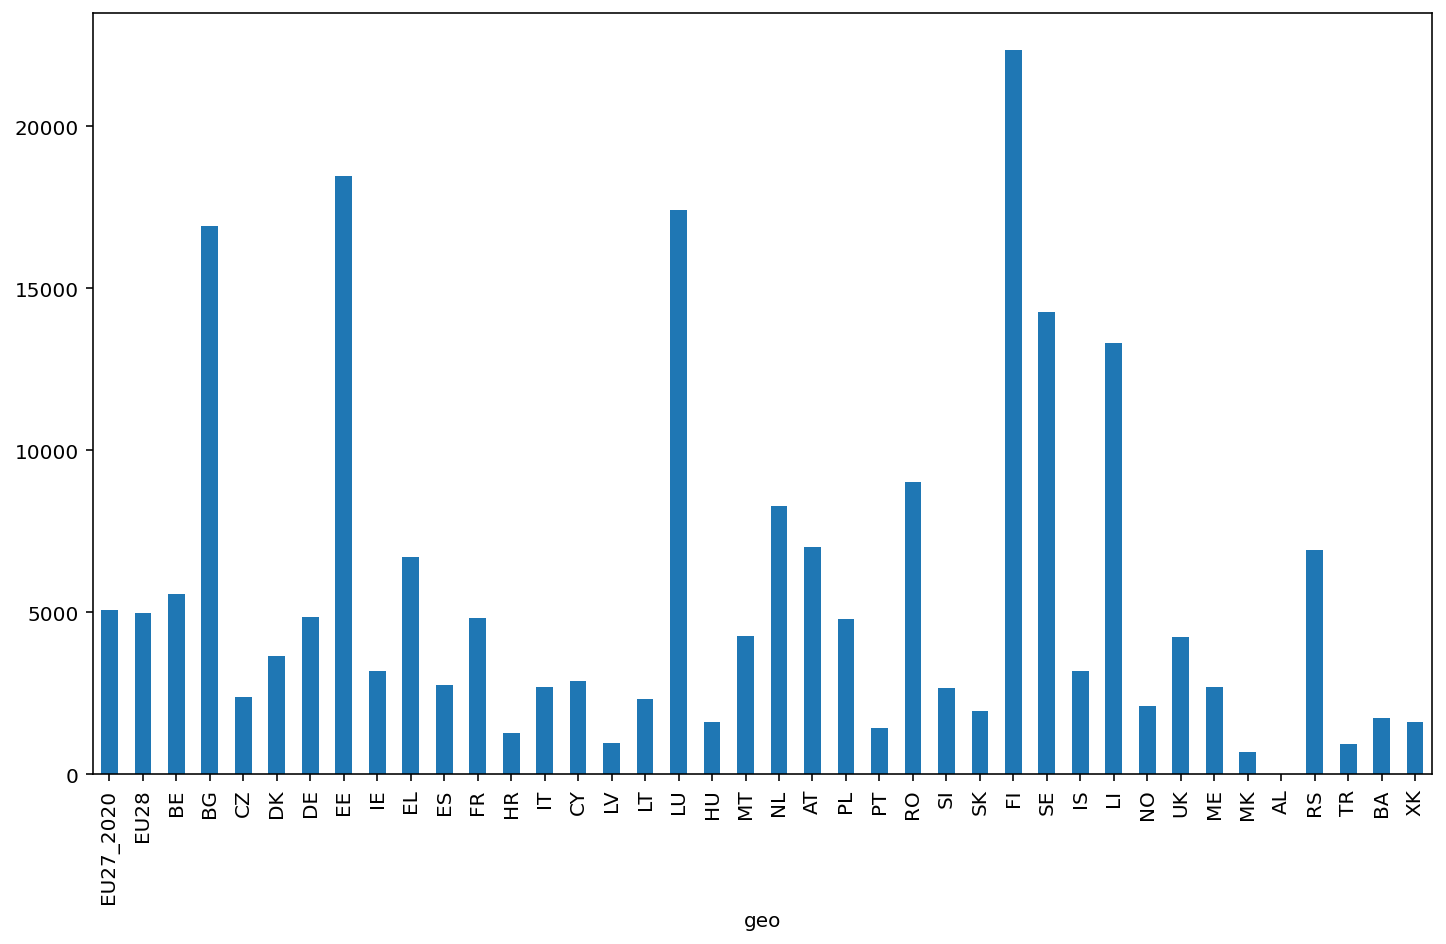

In [34]:
df[(df.year == "2016") & (df.unit == "KG_HAB") & (df.hazard == "HAZ_NHAZ") & (df.waste == "TOTAL") & (df.nace_r2 == "TOTAL_HH")].value.plot.bar()

## Storing data

In [64]:
df.to_csv("data/env_wasgen_combined.csv")

In [3]:
df = pd.read_csv("data/env_wasgen_combined.csv")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211200 entries, 0 to 211199
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   geo      211200 non-null  object 
 1   year     211200 non-null  int64  
 2   value    95562 non-null   float64
 3   unit     211200 non-null  object 
 4   hazard   211200 non-null  object 
 5   waste    211200 non-null  object 
 6   nace_r2  211200 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.3+ MB


In [4]:
df[df.select_dtypes("object").columns] = df.select_dtypes("object").apply(lambda x: pd.Series(x).astype("category"))

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211200 entries, 0 to 211199
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   geo      211200 non-null  category
 1   year     211200 non-null  int64   
 2   value    95562 non-null   float64 
 3   unit     211200 non-null  category
 4   hazard   211200 non-null  category
 5   waste    211200 non-null  category
 6   nace_r2  211200 non-null  category
dtypes: category(5), float64(1), int64(1)
memory usage: 4.2 MB


In [5]:
df = df.set_index("geo")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 211200 entries, EU27_2020 to XK
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   year     211200 non-null  int64   
 1   value    95562 non-null   float64 
 2   unit     211200 non-null  category
 3   hazard   211200 non-null  category
 4   waste    211200 non-null  category
 5   nace_r2  211200 non-null  category
dtypes: category(4), float64(1), int64(1)
memory usage: 4.2 MB


In [7]:
df.to_parquet("data/env_wasgen_combined.parquet")

In [8]:
df = pd.read_parquet("data/env_wasgen_combined.parquet")

In [9]:
df

,year,value,unit,hazard,waste,nace_r2
geo,,,,,,
EU27_2020,2004,146.0,KG_HAB,HAZ_NHAZ,TOTAL,A
EU28,2004,130.0,KG_HAB,HAZ_NHAZ,TOTAL,A
BE,2004,114.0,KG_HAB,HAZ_NHAZ,TOTAL,A
BG,2004,94.0,KG_HAB,HAZ_NHAZ,TOTAL,A
CZ,2004,122.0,KG_HAB,HAZ_NHAZ,TOTAL,A
...,...,...,...,...,...,...
AL,2018,NaN,T,NHAZ,TOT_X_MIN,TOTAL_HH
RS,2018,11780914.0,T,NHAZ,TOT_X_MIN,TOTAL_HH
TR,2018,74786520.0,T,NHAZ,TOT_X_MIN,TOTAL_HH


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 211200 entries, EU27_2020 to XK
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   year     211200 non-null  int64   
 1   value    95562 non-null   float64 
 2   unit     211200 non-null  category
 3   hazard   211200 non-null  category
 4   waste    211200 non-null  category
 5   nace_r2  211200 non-null  category
dtypes: category(4), float64(1), int64(1)
memory usage: 4.2 MB


<AxesSubplot:xlabel='geo'>

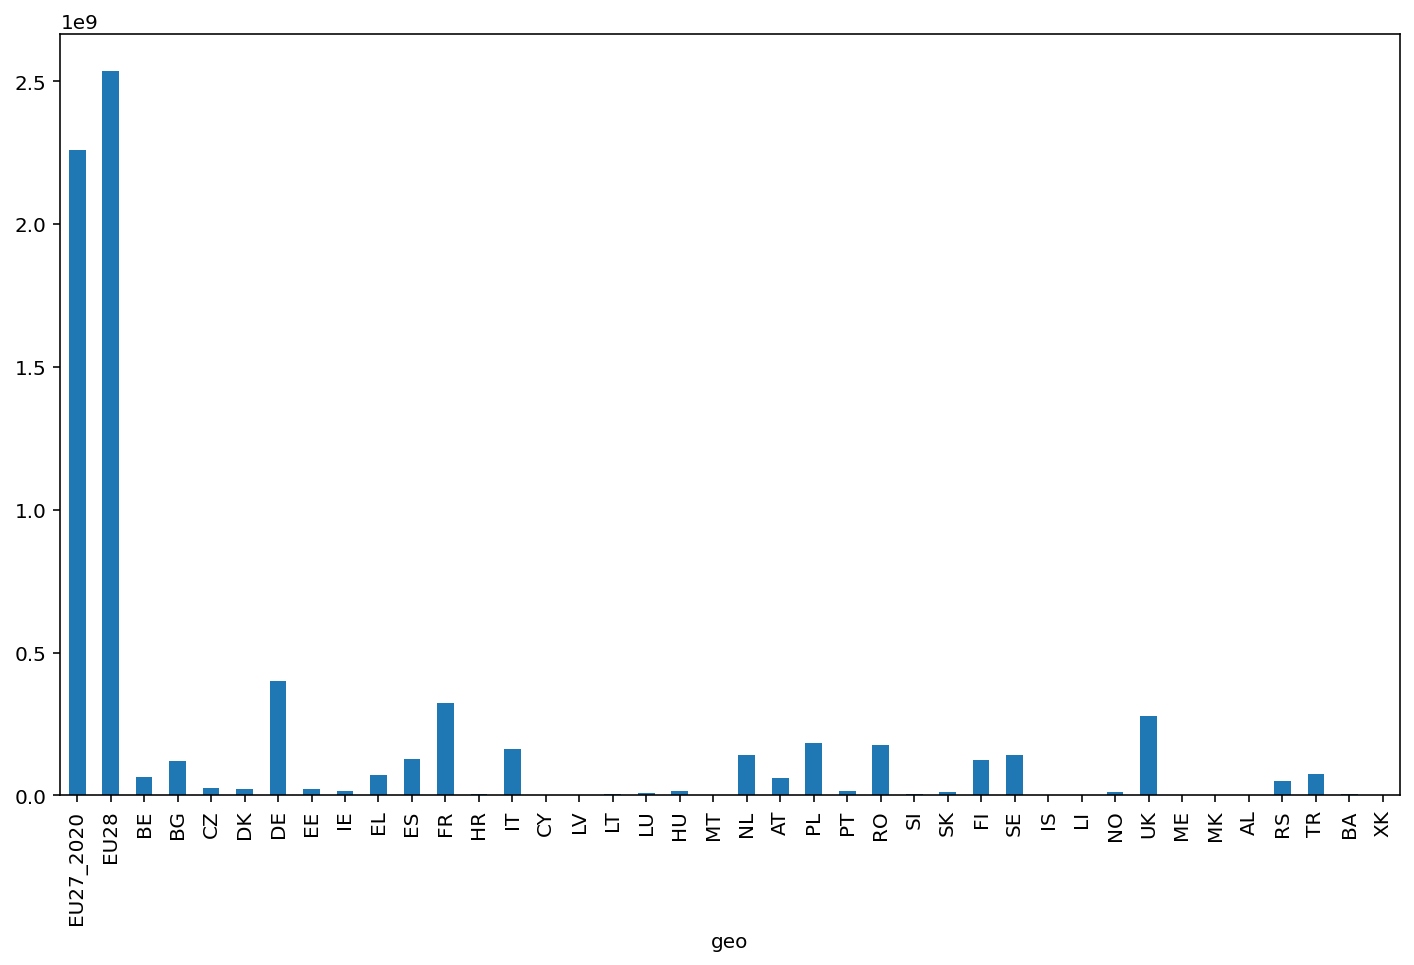

In [12]:
df[(df.year == 2016) & (df.unit == "T") & (df.hazard == "HAZ_NHAZ") & (df.waste == "TOTAL") & (df.nace_r2 == "TOTAL_HH")].value.plot.bar()